<a href="https://colab.research.google.com/github/AayushiPatel123/Machine-Learning/blob/Sequential-NN-afrfchitecture/Sequential_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [5]:
circles_dataset = pd.read_csv('circles0.3.csv')
# circles_dataset = pd.read_csv('Breastcancer.csv')
# circles_dataset = pd.read_csv('halfkernel.csv')
# circles_dataset = pd.read_csv('moons1.csv')
# circles_dataset = pd.read_csv('spiral1.csv')
# circles_dataset = pd.read_csv('twogaussians33.csv')
# circles_dataset = pd.read_csv('twogaussians42.csv')
X_circles = circles_dataset.iloc[:,:-1].values
Y_circles = circles_dataset.iloc[:,-1].values
#Y_circles = Y_circles.reshape(-1,1)
circles_dataset.head()

,x1,x2,label
0,-1.047089,0.149405,0
1,-0.417893,-0.064341,1
2,-0.873634,0.810346,0
3,-0.845811,0.439035,0
4,0.844557,0.484532,0


In [6]:
from sklearn.model_selection import train_test_split
X_circles_train,X_circles_test,y_circles_train,y_circles_test = train_test_split(X_circles, Y_circles, test_size=0.2,random_state=0)

In [13]:
import tensorflow as tf
from tensorflow import keras
model_2 = tf.keras.models.Sequential()
#Input and hidden layer
model_2.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
#2nd Hidden layer
model_2.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
#output layer
model_2.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
#compiling the NN
model_2.compile ( optimizer='Adam', metrics= ['accuracy'] ,loss= 'binary_crossentropy' )
# fitting the model with batch learning
data=model_2.fit(X_circles_train,y_circles_train, batch_size = 32, epochs = 50 ,validation_data=(X_circles, Y_circles))

Epoch 1/50
25/25 [==============================] - 2s 33ms/step - loss: 0.2373 - accuracy: 0.5013 - val_loss: 0.2332 - val_accuracy: 0.5210
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 0.2303 - accuracy: 0.5375 - val_loss: 0.2261 - val_accuracy: 0.6200
Epoch 3/50
25/25 [==============================] - 0s 10ms/step - loss: 0.2228 - accuracy: 0.6900 - val_loss: 0.2183 - val_accuracy: 0.7640
Epoch 4/50
25/25 [==============================] - 0s 8ms/step - loss: 0.2146 - accuracy: 0.7887 - val_loss: 0.2104 - val_accuracy: 0.8280
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 0.2065 - accuracy: 0.8388 - val_loss: 0.2018 - val_accuracy: 0.8670
Epoch 6/50
25/25 [==============================] - 0s 17ms/step - loss: 0.1970 - accuracy: 0.8725 - val_loss: 0.1918 - val_accuracy: 0.8940
Epoch 7/50
25/25 [==============================] - 0s 11ms/step - loss: 0.1865 - accuracy: 0.9000 - val_loss: 0.1813 - val_accuracy: 0.9160
Epoch 8/50
25/25

In [14]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 18        
                                                                 
 dense_4 (Dense)             (None, 7)                 49        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


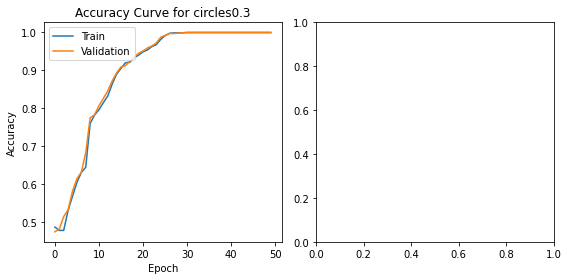

In [9]:
import matplotlib.pyplot as plot
fig, axes = plot.subplots(nrows=1, ncols=2, figsize=(8, 4))
# Plot training & validation accuracy values
axes[0].plot(data.history['accuracy'])
axes[0].plot(data.history['val_accuracy'])
axes[0].legend(['Train', 'Validation'], loc='upper left')
axes[0].set_title('Accuracy Curve for circles0.3')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')

plot.tight_layout()
plot.show()

In [10]:
Y_circles_pred = model_2.predict(X_circles_test)>0.5
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_circles_pred = label_encoder.fit_transform(Y_circles_pred)
print(Y_circles_pred)

7/7 [==============================] - 0s 2ms/step
[0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0
 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0
 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
circles_RF_cm = confusion_matrix(y_circles_test,Y_circles_pred)
print ("Confusion matrix for circles Dataset with RF classifier is : ")
print(circles_RF_cm)

circles_RF_ac = (accuracy_score(y_circles_test,Y_circles_pred)*100)
print ("Accuracy for circles Dataset with RF classifier is :")
print(circles_RF_ac)

Confusion matrix for circles Dataset with RF classifier is : 
[[ 97   0]
 [  1 102]]
Accuracy for circles Dataset with RF classifier is :
99.5
